In [5]:
import pandas as pd
df=pd.read_csv('StudentsPerformance.csv')
df.sample(5)

gender race/ethnicity parental level of education         lunch  \
509  female        group C           bachelor's degree      standard   
763  female        group B                 high school      standard   
723    male        group C                 high school      standard   
299    male        group D          associate's degree  free/reduced   
215    male        group B            some high school      standard   

    test preparation course  math score  reading score  writing score  
509                    none          86             92             87  
763                    none          62             62             63  
723                    none          50             48             42  
299                    none          90             87             75  
215               completed          84             83             75

#LOADING DATASET AND LOOKING FOR INFORMATION

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#Checking for Null values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# ADDING NEW COLS : TOTAL  SCORE & AVG SCORE

In [8]:
df['Total_Score']=df['math score']+df['reading score']+df['writing score']
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total_Score  
0          218  
1          247  
2          278  
3          148  
4          229

In [9]:
df['avg_score']=df['Total_Score']/3
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Total_Score  avg_score  
0            218  72.666667  
1            247  82.333333  
2            278  92.666667  
3            148  49.333333  
4            229  76.333333  
..           ...        ...  
995          282  94.000000  
996          172  57.333333  
997          195  65.000000  
998          223  74.333333  
999          249  83.000000  

[1000 rows x 10 columns]

#RANK

In [10]:
df['rank']=df['Total_Score'].rank(ascending=False,method='dense').astype(int)
df.sample(5).shape

(5, 11)

In [11]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

#DROPPING LUNCH

In [12]:
df.drop('lunch',axis=1,inplace=True)
df

gender race/ethnicity parental level of education  \
0    female        group B           bachelor's degree   
1    female        group C                some college   
2    female        group B             master's degree   
3      male        group A          associate's degree   
4      male        group C                some college   
..      ...            ...                         ...   
995  female        group E             master's degree   
996    male        group C                 high school   
997  female        group C                 high school   
998  female        group D                some college   
999  female        group D                some college   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72             74   
1                 completed          69             90             88   
2                      none          90             95             93   
3                      none          47             57             44   
4                      none          76             78             75   
..                      ...         ...            ...            ...   
995               completed          88             99             95   
996                    none          62             55             55   
997               completed          59             71             65   
998               completed          68             78             77   
999                    none          77             86             86   

     Total_Score  avg_score  rank  
0            218  72.666667    76  
1            247  82.333333    47  
2            278  92.666667    16  
3            148  49.333333   146  
4            229  76.333333    65  
..           ...        ...   ...  
995          282  94.000000    12  
996          172  57.333333   122  
997          195  65.000000    99  
998          223  74.333333    71  
999          249  83.000000    45  

[1000 rows x 10 columns]

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline

Encoding Steps

In [14]:
onehot_cols = ['gender','race/ethnicity']
ordinal_cols = ['parental level of education', 'test preparation course']

In [15]:
edu_level = [
    "some high school","high school","some college","associate's degree","bachelor's degree","master's degree"
]

prep_order = ["none", "completed"]

#COLUMN TRANSFORMER


In [16]:
transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"),onehot_cols),
        ("edu_ordinal", OrdinalEncoder(categories=[edu_level]), ['parental level of education']),
        ("prep_ordinal", OrdinalEncoder(categories=[prep_order]), ['test preparation course'])
    ]
)

# Example pipeline with just preprocessing (you can later add a model like LinearRegression)
pipeline = Pipeline(steps=[("transformer", transformer)])

In [20]:
transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(drop="first"),onehot_cols),
        ("edu_ordinal", OrdinalEncoder(categories=[edu_level]), ['parental level of education']),
        ("prep_ordinal", OrdinalEncoder(categories=[prep_order]), ['test preparation course']),
        ("num", StandardScaler(), ['math score'])
    ]
)

# Example pipeline with just preprocessing (you can later add a model like LinearRegression)
pipeline = Pipeline(steps=[("transformer", transformer)])

#Embedding columns

In [24]:
from sklearn.model_selection import train_test_split

# Get the feature matrix
X = df.drop(columns=['avg_score','Total_Score','rank'])
y = df['avg_score']

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Get feature names from one-hot
onehot_features = pipeline.named_steps['transformer'].named_transformers_['onehot'].get_feature_names_out(onehot_cols)

# Ordinal + numeric columns (they keep original names)
edu_features = ['parental level of education']
prep_features = ['test preparation course']
numeric_features = ['math score']

# Combine all column names
all_features = list(onehot_features) + edu_features + prep_features + numeric_features

# Transform X using the fitted pipeline
X_transformed = pipeline.transform(X)


# Convert transformed X (numpy) into DataFrame
X_transformed_df = pd.DataFrame(X_transformed, columns=all_features)

print(X_transformed_df.head())

   gender_male  race/ethnicity_group B  race/ethnicity_group C  \
0          0.0                     1.0                     0.0   
1          0.0                     0.0                     1.0   
2          0.0                     1.0                     0.0   
3          1.0                     0.0                     0.0   
4          1.0                     0.0                     1.0   

   race/ethnicity_group D  race/ethnicity_group E  \
0                     0.0                     0.0   
1                     0.0                     0.0   
2                     0.0                     0.0   
3                     0.0                     0.0   
4                     0.0                     0.0   

   parental level of education  test preparation course  math score  
0                          4.0                      0.0    0.366552  
1                          2.0                      1.0    0.166751  
2                          5.0                      0.0    1.565361  
3   

#BASIC STATISTICS

Relation between gender

gender
female    518
male      482
Name: count, dtype: int64

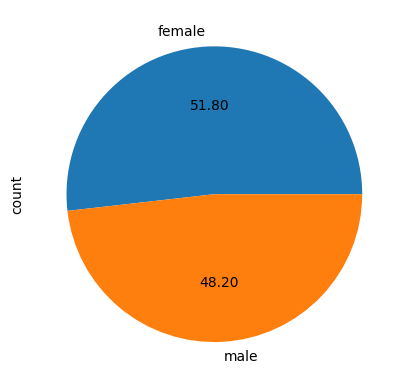

In [25]:
df['gender'].value_counts().plot(kind='pie',autopct='%.2f')
df['gender'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

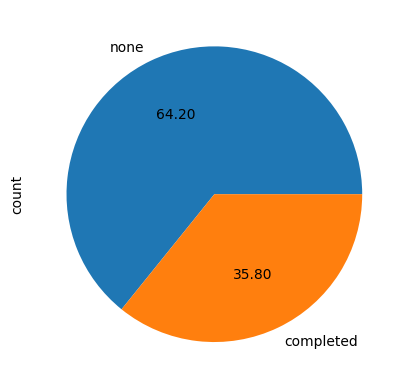

In [26]:
df['test preparation course'].value_counts().plot(kind='pie',autopct='%.2f')
df['test preparation course'].value_counts()

<Axes: ylabel='avg_score'>

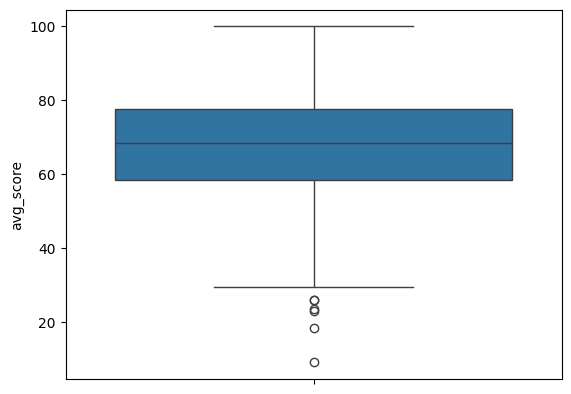

In [27]:
import seaborn as sns
sns.boxplot(df['avg_score'])

<Axes: ylabel='Total_Score'>

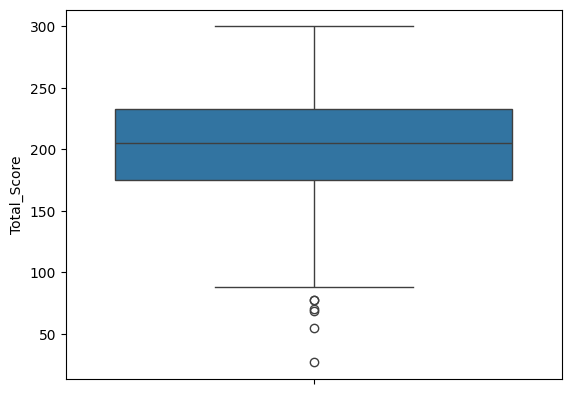

In [28]:
sns.boxplot(df['Total_Score'])

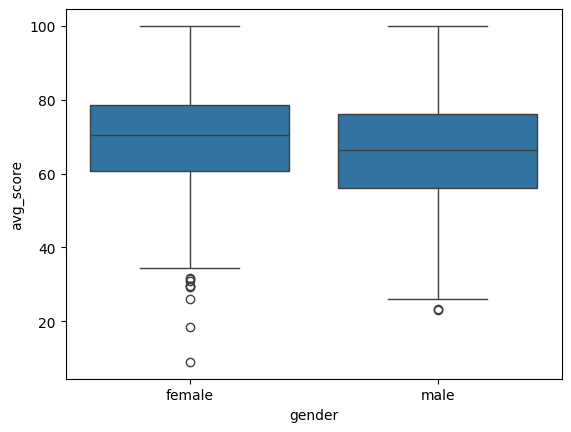

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="gender", y="avg_score", data=df)

plt.show()

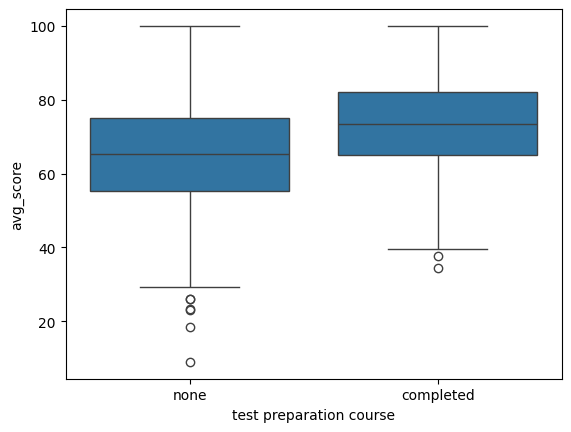

In [30]:
sns.boxplot(x="test preparation course", y="avg_score", data=df)
plt.show()

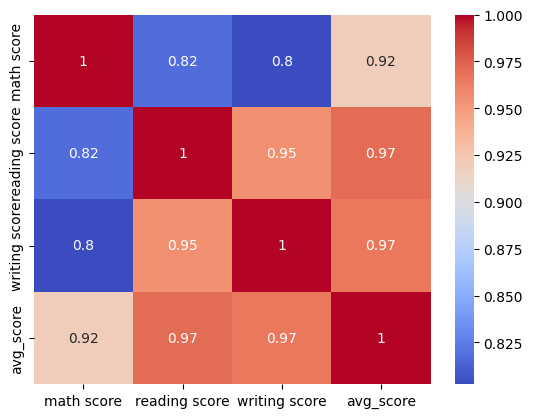

In [31]:
corr = df[['math score','reading score','writing score','avg_score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

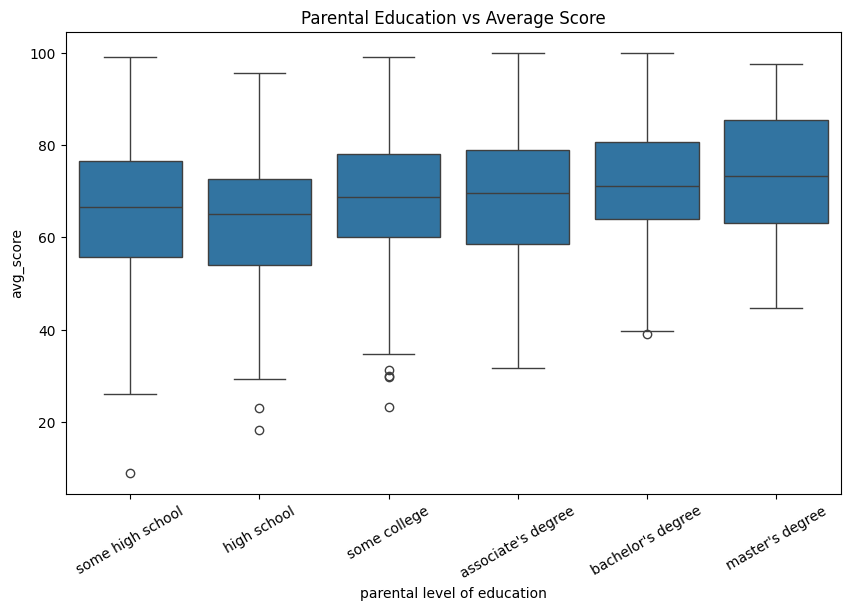

/tmp/ipython-input-1401171578.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="parental level of education", y="avg_score", data=df, order=edu_order, estimator="mean", ci=None)


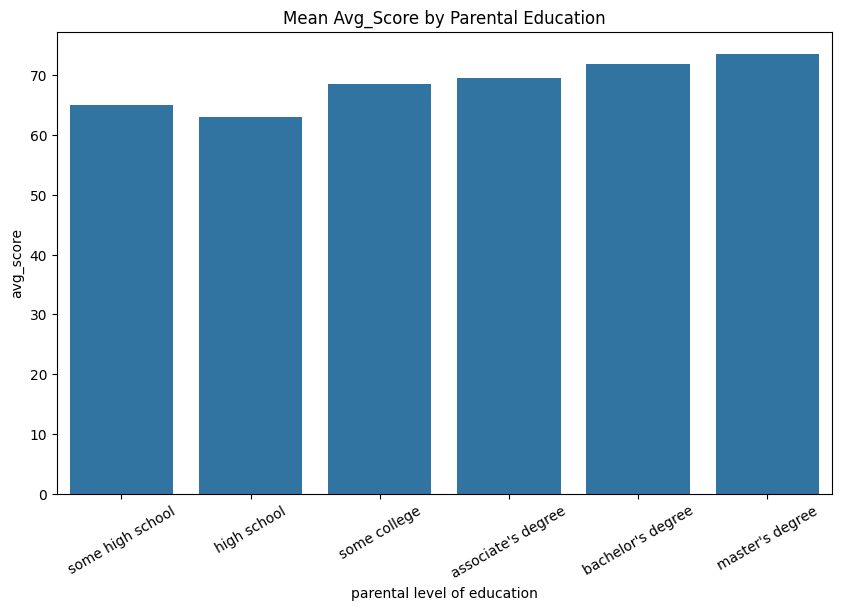

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order for parental education
edu_order = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Plot boxplot to see distribution
plt.figure(figsize=(10,6))
sns.boxplot(x="parental level of education", y="avg_score", data=df, order=edu_order)
plt.xticks(rotation=30)
plt.title("Parental Education vs Average Score")
plt.show()

# Optional: Plot barplot (mean values only)
plt.figure(figsize=(10,6))
sns.barplot(x="parental level of education", y="avg_score", data=df, order=edu_order, estimator="mean", ci=None)
plt.xticks(rotation=30)
plt.title("Mean Avg_Score by Parental Education")
plt.show()

#MODEL TRAINING

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
x=df.drop(columns=['avg_score','Total_Score'])
y=df['avg_score']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#LINEAR REGRESSION

In [35]:
model=Pipeline(steps=[('transformer',transformer),('regressor',LinearRegression())])
model.fit(x_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'race/ethnicity']),
                                                 ('edu_ordinal',
                                                  OrdinalEncoder(categories=[['some '
                                                                              'high '
                                                                              'school',
                                                                              'high '
                                                                              'school',
                                                                              'some '
                                                                              'college',
                                                                              "associate's "
                                                                              'degree',
                                                                              "bachelor's "
                                                                              'degree',
                                                                              "master's "
                                                                              'degree']]),
                                                  ['parental level of '
                                                   'education']),
                                                 ('prep_ordinal',
                                                  OrdinalEncoder(categories=[['none',
                                                                              'completed']]),
                                                  ['test preparation course']),
                                                 ('num', StandardScaler(),
                                                  ['math score'])])),
                ('regressor', LinearRegression())])

#PREDICTION STEP

In [36]:
y_pred=model.predict(x_test)

#MODEL ANALYSIS

In [37]:
print("R^2 Score :", r2_score(y_test,y_pred))
print("MSE :", mean_squared_error(y_test,y_pred))

R^2 Score : 0.9472465560447979
MSE : 11.308574660519092


#WHY LINEARREGRESSION

In [38]:
from sklearn.tree import DecisionTreeRegressor

tree_model = Pipeline(steps=[("transformer", transformer), ("regressor", DecisionTreeRegressor(max_depth=3))])
tree_model.fit(x_train, y_train)
y_pred_tree = tree_model.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error
print("Decision Tree R²:", r2_score(y_test, y_pred_tree))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_tree))

Decision Tree R²: 0.8492495448815003
Decision Tree MSE: 32.31585748719021


Converting



In [49]:
# Example placeholder — replace with your actual class definition
class ReaminderColList:
    def __init__(self, columns):
        self.columns = columns

    def transform(self, X):
        return X[self.columns]

    def fit(self, X, y=None):
        return self

In [50]:
import pickle

# Save the trained model to a file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [51]:
!pip install streamlit


In [52]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder

# Load trained model
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

st.title("Student Average Score Prediction")

st.subheader("Enter Student Details:")

# User input
gender = st.selectbox("Gender", ['male', 'female'])
race = st.selectbox("Race/Ethnicity", ['group A', 'group B', 'group C', 'group D', 'group E'])
# The 'lunch' column was dropped during preprocessing, so it's not needed for prediction input
# lunch = st.selectbox("Lunch", ['standard', 'free/reduced'])
parental_education = st.selectbox(
    "Parental Level of Education",
    ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
)
test_prep = st.selectbox("Test Preparation Course", ['none', 'completed'])
math_score = st.number_input("Math Score", min_value=0, max_value=100, value=50)

# Create a DataFrame from user inputs with the correct column names and order
# The pipeline will handle the encoding and scaling
X_input = pd.DataFrame({
    'gender': [gender],
    'race/ethnicity': [race],
    'parental level of education': [parental_education],
    'test preparation course': [test_prep],
    'math score': [math_score]
})


# Predict using the loaded pipeline
prediction = model.predict(X_input)

st.success(f"Predicted Average Score: {prediction[0]:.2f}")

Overwriting app.py


Requirements

In [54]:
%%writefile requirements.txt
numpy
pandas
scikit-learn
matplotlib
seaborn
streamlit

Overwriting requirements.txt


#CROSS VALIDATION

R²: 0.9407811628160399
MSE: 12.02545514566766
RMSE: 3.4677738025522453
MAE: 2.775356027788474
Cross-validated R² scores: [0.95164737 0.93890062 0.92617359 0.93973302 0.93889677]
Mean CV R²: 0.9390702755399272


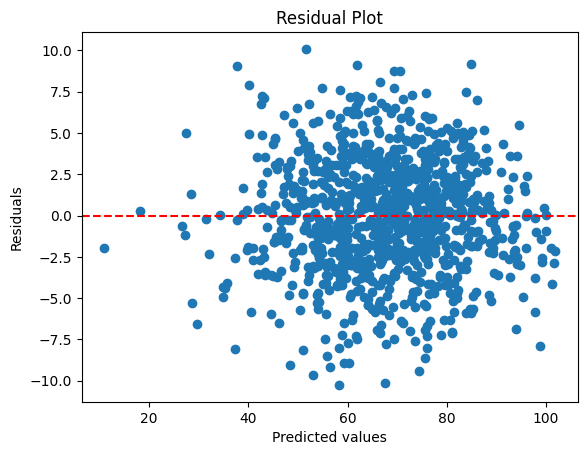

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assume X contains your features (math score + demographics)
# and y is your target variable

# Apply the full pipeline including preprocessing and scaling
X_processed = pipeline.fit_transform(X)

# 2️⃣ Train linear regression
lr = LinearRegression()
lr.fit(X_processed, y)
pred = lr.predict(X_processed)

# 3️⃣ Evaluate metrics
mse = mean_squared_error(y, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, pred)
r2 = lr.score(X_processed, y)

print("R²:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

# 4️⃣ Cross-validation (5 folds)
cv_scores = cross_val_score(lr, X_processed, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", np.mean(cv_scores))

# 5️⃣ Residual plot
residuals = y - pred
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [56]:
import zipfile

# List of files to include
project_files = ["app.py", "StudentsPerformance.csv", "model.pkl", "requirements.txt"]

# Name of the zip file
zip_filename = "Student_Performance_Project.zip"

# Create zip
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for file in project_files:
        try:
            zipf.write(file)
            print(f"Added {file}")
        except FileNotFoundError:
            print(f"{file} not found, skipping.")

print(f"\nAll done! Download {zip_filename} from the Files tab.")

Added app.py
Added StudentsPerformance.csv
Added model.pkl
Added requirements.txt

All done! Download Student_Performance_Project.zip from the Files tab.


In [57]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.57.173.15:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1442, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1363, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1830, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/click/core.py", line 1226, in invoke
    return ctx.invoke(self.callback, **ctx.params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^